In [ ]:
# Task-2: Sentiment Classification using Naïve Bayes Classifier
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")
print("="*50)

Matplotlib is building the font cache; this may take a moment.


Libraries imported successfully!


STEP 1: DATA LOADING AND EXPLORATION
Dataset shape: (5000, 3)
Columns: ['review', 'cleaned_review', 'sentiment']

First few rows:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review sentiment  
0  one of the other reviewers has mentioned that ...  positive  
1  a wonderful little production the filming tech...  positive  
2  i thought this was a wonderful way to spend ti...  positive  
3  basically there is a family where a little boy...  negative  
4  petter mattei s love in the time of money is a...  positive  

Data types:
review            object
cleaned_review    object
sentiment         object
dtype: object

Missing values:
review            0
clea

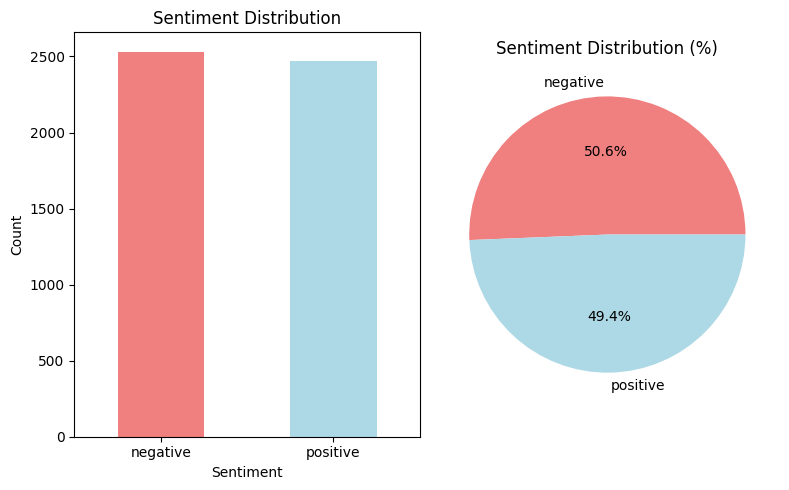


Step 1 completed ✓


In [3]:
# Step 1: Data Loading and Exploration
print("STEP 1: DATA LOADING AND EXPLORATION")
print("="*50)

# Load the dataset
df = pd.read_csv('cleaned_reviews.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
print(df.head())

# Check data types and missing values
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")

# Explore sentiment distribution
print(f"\nSentiment distribution:")
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)
print(f"\nClass balance: {sentiment_counts/len(df)*100}")

# Visualize class distribution
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sentiment_counts.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Sentiment Distribution (%)')

plt.tight_layout()
plt.show()

print("\nStep 1 completed ✓")

STEP 2: DATA PREPROCESSING AND TEXT ANALYSIS
Total reviews: 5000
Unique sentiments: ['negative' 'positive']


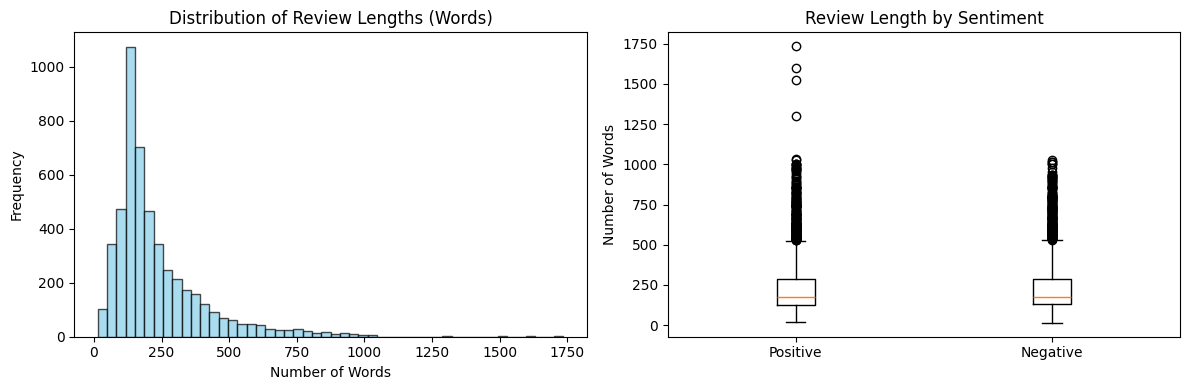

Average review length: 234.13 words
Median review length: 175.00 words
Max review length: 1735 words
Min review length: 14 words

Step 2 completed ✓


In [4]:
# Step 2: Data Preprocessing and Text Analysis
print("STEP 2: DATA PREPROCESSING AND TEXT ANALYSIS")
print("="*50)

# Use the cleaned_review column for analysis
reviews = df['cleaned_review'].values
sentiments = df['sentiment'].values

# Convert sentiments to binary (0 for negative, 1 for positive)
sentiment_map = {'negative': 0, 'positive': 1}
y = np.array([sentiment_map[sent] for sent in sentiments])

print(f"Total reviews: {len(reviews)}")
print(f"Unique sentiments: {np.unique(sentiments)}")

# Analyze text length distribution
review_lengths = [len(review.split()) for review in reviews]

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(review_lengths, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
positive_lengths = [len(reviews[i].split()) for i in range(len(reviews)) if y[i] == 1]
negative_lengths = [len(reviews[i].split()) for i in range(len(reviews)) if y[i] == 0]

plt.boxplot([positive_lengths, negative_lengths], labels=['Positive', 'Negative'])
plt.title('Review Length by Sentiment')
plt.ylabel('Number of Words')

plt.tight_layout()
plt.show()

print(f"Average review length: {np.mean(review_lengths):.2f} words")
print(f"Median review length: {np.median(review_lengths):.2f} words")
print(f"Max review length: {max(review_lengths)} words")
print(f"Min review length: {min(review_lengths)} words")

print("\nStep 2 completed ✓")

STEP 3: TRAIN-TEST SPLIT (70%-30%)
Training set size: 3500 (70.0%)
Test set size: 1500 (30.0%)

Training set class distribution:
  Positive: 1728 (49.4%)
  Negative: 1772 (50.6%)

Test set class distribution:
  Positive: 740 (49.3%)
  Negative: 760 (50.7%)


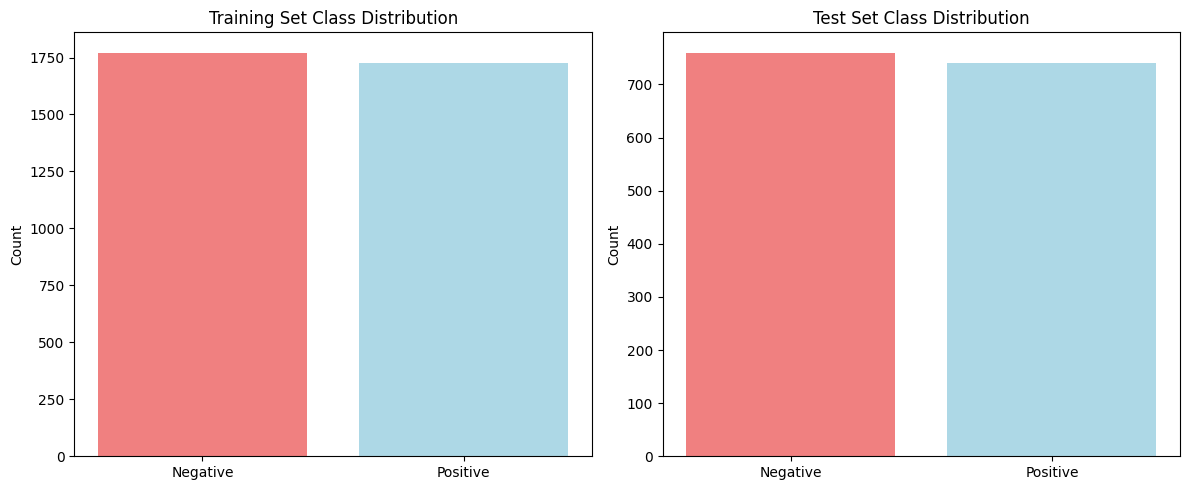


Step 3 completed ✓


In [5]:
# Step 3: Train-Test Split with Stratified Sampling (70%-30%)
print("STEP 3: TRAIN-TEST SPLIT (70%-30%)")
print("="*50)

# Stratified split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    reviews, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y  # This ensures balanced classes in both train and test sets
)

print(f"Training set size: {len(X_train)} ({len(X_train)/len(reviews)*100:.1f}%)")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(reviews)*100:.1f}%)")

# Verify class balance in train and test sets
train_positive = sum(y_train == 1)
train_negative = sum(y_train == 0)
test_positive = sum(y_test == 1)
test_negative = sum(y_test == 0)

print(f"\nTraining set class distribution:")
print(f"  Positive: {train_positive} ({train_positive/len(y_train)*100:.1f}%)")
print(f"  Negative: {train_negative} ({train_negative/len(y_train)*100:.1f}%)")

print(f"\nTest set class distribution:")
print(f"  Positive: {test_positive} ({test_positive/len(y_test)*100:.1f}%)")
print(f"  Negative: {test_negative} ({test_negative/len(y_test)*100:.1f}%)")

# Visualize the split
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Training set distribution
train_labels, train_counts = np.unique(y_train, return_counts=True)
ax1.bar(['Negative', 'Positive'], train_counts, color=['lightcoral', 'lightblue'])
ax1.set_title('Training Set Class Distribution')
ax1.set_ylabel('Count')

# Test set distribution
test_labels, test_counts = np.unique(y_test, return_counts=True)
ax2.bar(['Negative', 'Positive'], test_counts, color=['lightcoral', 'lightblue'])
ax2.set_title('Test Set Class Distribution')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

print("\nStep 3 completed ✓")

In [6]:
# Step 4: Feature Extraction (Vectorization)
print("STEP 4: FEATURE EXTRACTION")
print("="*50)

# Method 1: Count Vectorizer (Bag of Words)
print("Using Count Vectorizer (Bag of Words):")
count_vectorizer = CountVectorizer(
    max_features=5000,  # Limit to top 5000 most frequent words
    stop_words='english',  # Remove common English stop words
    min_df=2,  # Ignore words that appear in less than 2 documents
    max_df=0.95,  # Ignore words that appear in more than 95% of documents
    ngram_range=(1, 2)  # Use both unigrams and bigrams
)

# Transform training data
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

print(f"Vocabulary size: {len(count_vectorizer.vocabulary_)}")
print(f"Training feature matrix shape: {X_train_count.shape}")
print(f"Test feature matrix shape: {X_test_count.shape}")

# Method 2: TF-IDF Vectorizer
print("\nUsing TF-IDF Vectorizer:")
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    min_df=2,
    max_df=0.95,
    ngram_range=(1, 2)
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")
print(f"Training TF-IDF matrix shape: {X_train_tfidf.shape}")
print(f"Test TF-IDF matrix shape: {X_test_tfidf.shape}")

# Display most frequent words
feature_names = count_vectorizer.get_feature_names_out()
word_counts = np.array(X_train_count.sum(axis=0)).flatten()
word_freq = list(zip(feature_names, word_counts))
word_freq.sort(key=lambda x: x[1], reverse=True)

print(f"\nTop 20 most frequent words:")
for i, (word, count) in enumerate(word_freq[:20]):
    print(f"{i+1:2}. {word:15} : {count}")

print("\nStep 4 completed ✓")

STEP 4: FEATURE EXTRACTION
Using Count Vectorizer (Bag of Words):
Vocabulary size: 5000
Training feature matrix shape: (3500, 5000)
Test feature matrix shape: (1500, 5000)

Using TF-IDF Vectorizer:
Vocabulary size: 5000
Training feature matrix shape: (3500, 5000)
Test feature matrix shape: (1500, 5000)

Using TF-IDF Vectorizer:
TF-IDF vocabulary size: 5000
Training TF-IDF matrix shape: (3500, 5000)
Test TF-IDF matrix shape: (1500, 5000)

Top 20 most frequent words:
 1. movie           : 6204
 2. film            : 5597
 3. like            : 2833
 4. just            : 2439
 5. good            : 2044
 6. time            : 1770
 7. story           : 1665
 8. really          : 1564
 9. did             : 1426
10. does            : 1414
11. bad             : 1306
12. people          : 1273
13. great           : 1224
14. way             : 1135
15. make            : 1113
16. movies          : 1050
17. characters      : 1034
18. think           : 1004
19. character       : 971
20. watch         

In [7]:
# Step 5: Naive Bayes Model Training and Prediction
print("STEP 5: NAÏVE BAYES MODEL TRAINING")
print("="*50)

# Train models with both Count and TF-IDF features
print("Training Naïve Bayes models...")

# Model 1: Multinomial Naive Bayes with Count Vectorizer
nb_count = MultinomialNB(alpha=1.0)  # alpha=1.0 for Laplace smoothing
nb_count.fit(X_train_count, y_train)

# Model 2: Multinomial Naive Bayes with TF-IDF
nb_tfidf = MultinomialNB(alpha=1.0)
nb_tfidf.fit(X_train_tfidf, y_train)

print("Models trained successfully!")

# Make predictions
print("\nMaking predictions...")
y_pred_count = nb_count.predict(X_test_count)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

# Get prediction probabilities
y_proba_count = nb_count.predict_proba(X_test_count)
y_proba_tfidf = nb_tfidf.predict_proba(X_test_tfidf)

print("Predictions completed!")

# Calculate accuracies
accuracy_count = accuracy_score(y_test, y_pred_count)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

print(f"\nModel Performance:")
print(f"Count Vectorizer Accuracy: {accuracy_count:.4f} ({accuracy_count*100:.2f}%)")
print(f"TF-IDF Vectorizer Accuracy: {accuracy_tfidf:.4f} ({accuracy_tfidf*100:.2f}%)")

# Choose the better model for detailed analysis
if accuracy_count >= accuracy_tfidf:
    best_model = nb_count
    best_predictions = y_pred_count
    best_probabilities = y_proba_count
    best_vectorizer = "Count Vectorizer"
    X_test_best = X_test_count
else:
    best_model = nb_tfidf
    best_predictions = y_pred_tfidf
    best_probabilities = y_proba_tfidf
    best_vectorizer = "TF-IDF Vectorizer"
    X_test_best = X_test_tfidf

print(f"\nBest performing model: Naïve Bayes with {best_vectorizer}")

print("\nStep 5 completed ✓")

STEP 5: NAÏVE BAYES MODEL TRAINING
Training Naïve Bayes models...
Models trained successfully!

Making predictions...
Predictions completed!

Model Performance:
Count Vectorizer Accuracy: 0.8353 (83.53%)
TF-IDF Vectorizer Accuracy: 0.8487 (84.87%)

Best performing model: Naïve Bayes with TF-IDF Vectorizer

Step 5 completed ✓


STEP 6: CONFUSION MATRIX VISUALIZATION


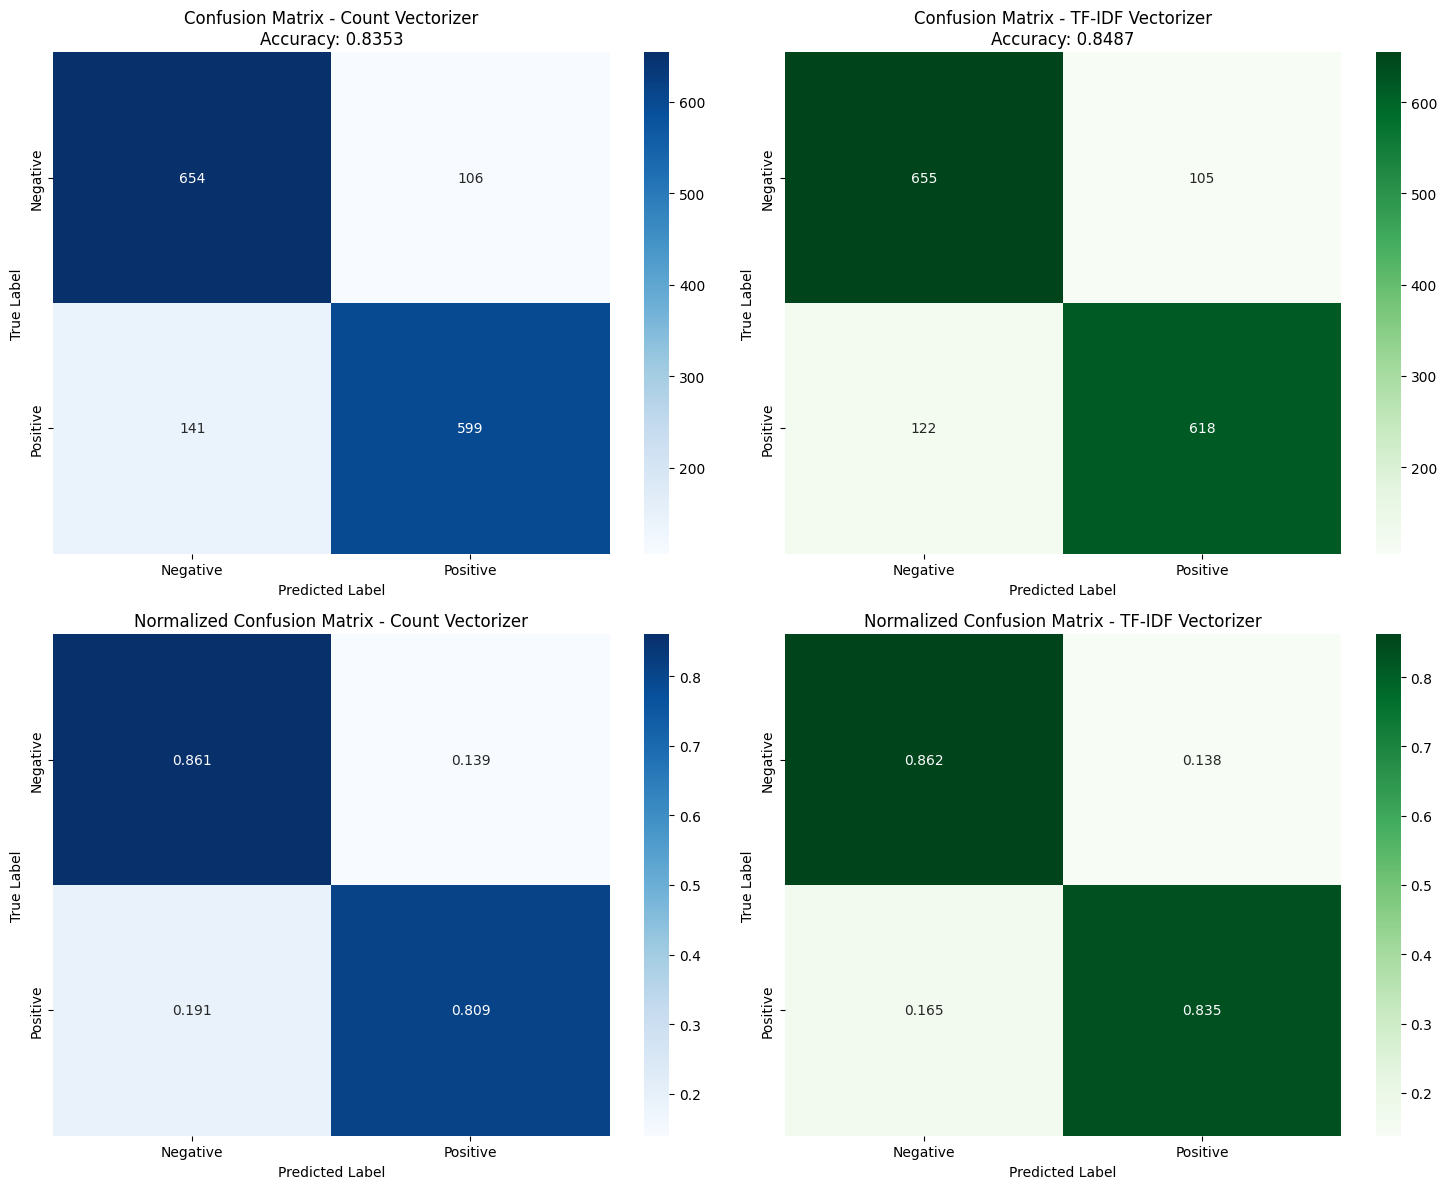

Detailed Confusion Matrix Analysis:
Count Vectorizer Results:
True Negatives (TN):  654
False Positives (FP): 106
False Negatives (FN): 141
True Positives (TP):  599

TF-IDF Vectorizer Results:
True Negatives (TN):  655
False Positives (FP): 105
False Negatives (FN): 122
True Positives (TP):  618

Step 6 completed ✓


In [8]:
# Step 6: Confusion Matrix Visualization
print("STEP 6: CONFUSION MATRIX VISUALIZATION")
print("="*50)

# Calculate confusion matrices for both models
cm_count = confusion_matrix(y_test, y_pred_count)
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)

# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Confusion Matrix for Count Vectorizer
sns.heatmap(cm_count, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'], ax=ax1)
ax1.set_title(f'Confusion Matrix - Count Vectorizer\nAccuracy: {accuracy_count:.4f}')
ax1.set_ylabel('True Label')
ax1.set_xlabel('Predicted Label')

# Confusion Matrix for TF-IDF
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'], ax=ax2)
ax2.set_title(f'Confusion Matrix - TF-IDF Vectorizer\nAccuracy: {accuracy_tfidf:.4f}')
ax2.set_ylabel('True Label')
ax2.set_xlabel('Predicted Label')

# Normalized Confusion Matrix for Count Vectorizer
cm_count_norm = cm_count.astype('float') / cm_count.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_count_norm, annot=True, fmt='.3f', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'], ax=ax3)
ax3.set_title('Normalized Confusion Matrix - Count Vectorizer')
ax3.set_ylabel('True Label')
ax3.set_xlabel('Predicted Label')

# Normalized Confusion Matrix for TF-IDF
cm_tfidf_norm = cm_tfidf.astype('float') / cm_tfidf.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_tfidf_norm, annot=True, fmt='.3f', cmap='Greens', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'], ax=ax4)
ax4.set_title('Normalized Confusion Matrix - TF-IDF Vectorizer')
ax4.set_ylabel('True Label')
ax4.set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

# Print detailed confusion matrix analysis
print("Detailed Confusion Matrix Analysis:")
print("="*40)
print("Count Vectorizer Results:")
print(f"True Negatives (TN):  {cm_count[0,0]}")
print(f"False Positives (FP): {cm_count[0,1]}")
print(f"False Negatives (FN): {cm_count[1,0]}")
print(f"True Positives (TP):  {cm_count[1,1]}")

print("\nTF-IDF Vectorizer Results:")
print(f"True Negatives (TN):  {cm_tfidf[0,0]}")
print(f"False Positives (FP): {cm_tfidf[0,1]}")
print(f"False Negatives (FN): {cm_tfidf[1,0]}")
print(f"True Positives (TP):  {cm_tfidf[1,1]}")

print("\nStep 6 completed ✓")

In [10]:
# Step 7: Performance Metrics - Precision, Recall, and F1-Score
print("STEP 7: PERFORMANCE METRICS")
print("="*50)

def calculate_metrics(y_true, y_pred, model_name):
    """Calculate and display detailed metrics"""
    
    # Calculate metrics for each class
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    
    # Calculate macro and weighted averages
    precision_macro = precision_score(y_true, y_pred, average='macro')
    recall_macro = recall_score(y_true, y_pred, average='macro')
    f1_macro = f1_score(y_true, y_pred, average='macro')
    
    precision_weighted = precision_score(y_true, y_pred, average='weighted')
    recall_weighted = recall_score(y_true, y_pred, average='weighted')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    
    accuracy = accuracy_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance Metrics:")
    print("-" * (len(model_name) + 22))
    
    print("\nPer-Class Metrics:")
    print(f"{'Class':>15} {'Precision':>10} {'Recall':>10} {'F1-Score':>10}")
    print(f"{'Negative (0)':>15} {precision[0]:>9.4f} {recall[0]:>9.4f} {f1[0]:>9.4f}")
    print(f"{'Positive (1)':>15} {precision[1]:>9.4f} {recall[1]:>9.4f} {f1[1]:>9.4f}")
    
    print(f"\nAveraged Metrics:")
    print(f"{'Metric':>15} {'Macro Avg':>10} {'Weighted Avg':>12}")
    print(f"{'Precision':>15} {precision_macro:>9.4f} {precision_weighted:>11.4f}")
    print(f"{'Recall':>15} {recall_macro:>9.4f} {recall_weighted:>11.4f}")
    print(f"{'F1-Score':>15} {f1_macro:>9.4f} {f1_weighted:>11.4f}")
    print(f"{'Accuracy':>15} {accuracy:>9.4f}")
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'f1_macro': f1_macro,
        'accuracy': accuracy
    }

# Calculate metrics for both models
metrics_count = calculate_metrics(y_test, y_pred_count, "Count Vectorizer Model")
metrics_tfidf = calculate_metrics(y_test, y_pred_tfidf, "TF-IDF Vectorizer Model")

# Detailed classification reports
print("\n" + "="*70)
print("DETAILED CLASSIFICATION REPORTS")
print("="*70)

print("\nCount Vectorizer - Classification Report:")
print(classification_report(y_test, y_pred_count, 
                          target_names=['Negative', 'Positive'], 
                          digits=4))

print("\nTF-IDF Vectorizer - Classification Report:")
print(classification_report(y_test, y_pred_tfidf, 
                          target_names=['Negative', 'Positive'], 
                          digits=4))

print("Step 7 completed ✓")

STEP 7: PERFORMANCE METRICS

Count Vectorizer Model Performance Metrics:
--------------------------------------------

Per-Class Metrics:
          Class  Precision     Recall   F1-Score
   Negative (0)    0.8226    0.8605    0.8412
   Positive (1)    0.8496    0.8095    0.8291

Averaged Metrics:
         Metric  Macro Avg Weighted Avg
      Precision    0.8361      0.8360
         Recall    0.8350      0.8353
       F1-Score    0.8351      0.8352
       Accuracy    0.8353

TF-IDF Vectorizer Model Performance Metrics:
---------------------------------------------

Per-Class Metrics:
          Class  Precision     Recall   F1-Score
   Negative (0)    0.8430    0.8618    0.8523
   Positive (1)    0.8548    0.8351    0.8448

Averaged Metrics:
         Metric  Macro Avg Weighted Avg
      Precision    0.8489      0.8488
         Recall    0.8485      0.8487
       F1-Score    0.8486      0.8486
       Accuracy    0.8487

DETAILED CLASSIFICATION REPORTS

Count Vectorizer - Classification Re

STEP 8: COMPARATIVE ANALYSIS AND VISUALIZATION


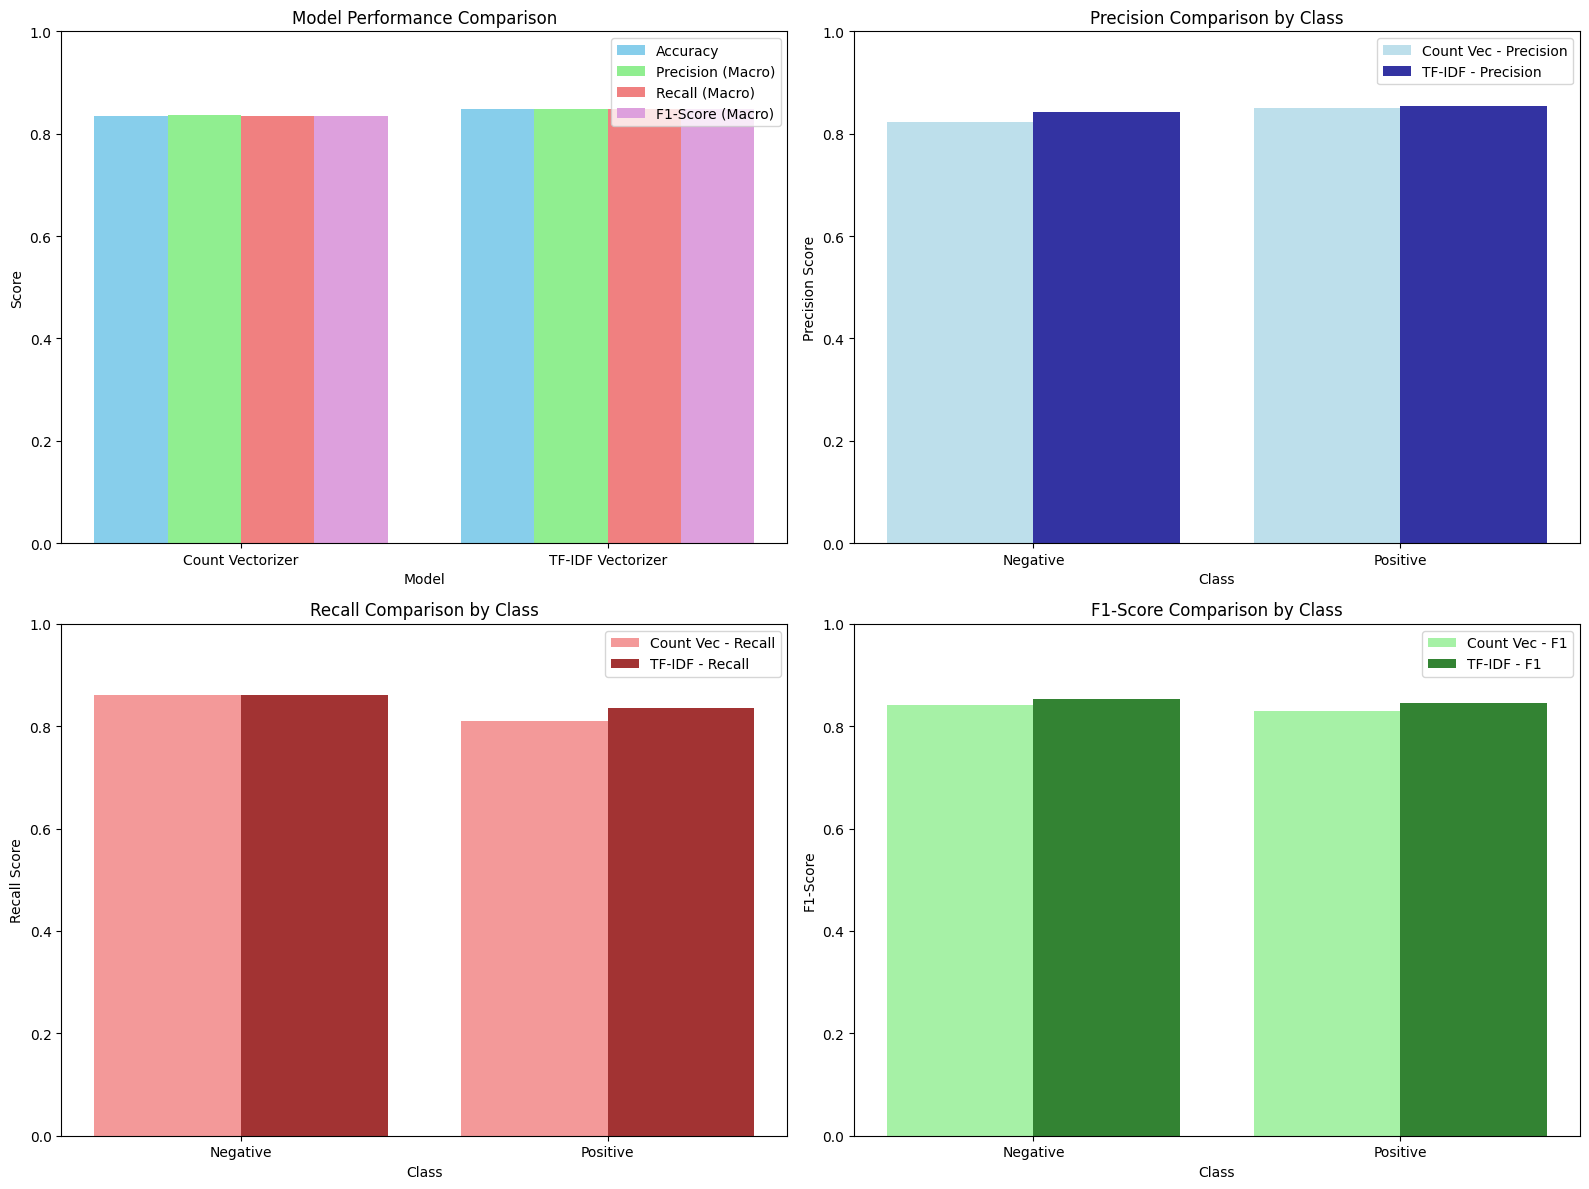


FINAL PERFORMANCE SUMMARY
Metric               Count Vectorizer   TF-IDF Vectorizer 
------------------------------------------------------------
Accuracy             0.8353             0.8487            
Precision (Macro)    0.8361             0.8489            
Recall (Macro)       0.8350             0.8485            
F1-Score (Macro)     0.8351             0.8486            

🏆 BEST MODEL: TF-IDF Vectorizer (F1-Score: 0.8486)

Step 8 completed ✓


In [11]:
# Step 8: Comparative Analysis and Visualization
print("STEP 8: COMPARATIVE ANALYSIS AND VISUALIZATION")
print("="*50)

# Create comparison visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Model Comparison Bar Chart
models = ['Count Vectorizer', 'TF-IDF Vectorizer']
accuracies = [metrics_count['accuracy'], metrics_tfidf['accuracy']]
precision_macros = [metrics_count['precision_macro'], metrics_tfidf['precision_macro']]
recall_macros = [metrics_count['recall_macro'], metrics_tfidf['recall_macro']]
f1_macros = [metrics_count['f1_macro'], metrics_tfidf['f1_macro']]

x = np.arange(len(models))
width = 0.2

ax1.bar(x - 1.5*width, accuracies, width, label='Accuracy', color='skyblue')
ax1.bar(x - 0.5*width, precision_macros, width, label='Precision (Macro)', color='lightgreen')
ax1.bar(x + 0.5*width, recall_macros, width, label='Recall (Macro)', color='lightcoral')
ax1.bar(x + 1.5*width, f1_macros, width, label='F1-Score (Macro)', color='plum')

ax1.set_xlabel('Model')
ax1.set_ylabel('Score')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()
ax1.set_ylim(0, 1)

# 2. Per-Class Performance Comparison
classes = ['Negative', 'Positive']
count_precision = metrics_count['precision']
count_recall = metrics_count['recall']
count_f1 = metrics_count['f1']

tfidf_precision = metrics_tfidf['precision']
tfidf_recall = metrics_tfidf['recall']
tfidf_f1 = metrics_tfidf['f1']

x2 = np.arange(len(classes))
ax2.bar(x2 - 0.2, count_precision, 0.4, label='Count Vec - Precision', color='lightblue', alpha=0.8)
ax2.bar(x2 + 0.2, tfidf_precision, 0.4, label='TF-IDF - Precision', color='darkblue', alpha=0.8)

ax2.set_xlabel('Class')
ax2.set_ylabel('Precision Score')
ax2.set_title('Precision Comparison by Class')
ax2.set_xticks(x2)
ax2.set_xticklabels(classes)
ax2.legend()
ax2.set_ylim(0, 1)

# 3. Recall Comparison
ax3.bar(x2 - 0.2, count_recall, 0.4, label='Count Vec - Recall', color='lightcoral', alpha=0.8)
ax3.bar(x2 + 0.2, tfidf_recall, 0.4, label='TF-IDF - Recall', color='darkred', alpha=0.8)

ax3.set_xlabel('Class')
ax3.set_ylabel('Recall Score')
ax3.set_title('Recall Comparison by Class')
ax3.set_xticks(x2)
ax3.set_xticklabels(classes)
ax3.legend()
ax3.set_ylim(0, 1)

# 4. F1-Score Comparison
ax4.bar(x2 - 0.2, count_f1, 0.4, label='Count Vec - F1', color='lightgreen', alpha=0.8)
ax4.bar(x2 + 0.2, tfidf_f1, 0.4, label='TF-IDF - F1', color='darkgreen', alpha=0.8)

ax4.set_xlabel('Class')
ax4.set_ylabel('F1-Score')
ax4.set_title('F1-Score Comparison by Class')
ax4.set_xticks(x2)
ax4.set_xticklabels(classes)
ax4.legend()
ax4.set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Summary table
print("\nFINAL PERFORMANCE SUMMARY")
print("="*60)
print(f"{'Metric':<20} {'Count Vectorizer':<18} {'TF-IDF Vectorizer':<18}")
print("-" * 60)
print(f"{'Accuracy':<20} {metrics_count['accuracy']:<18.4f} {metrics_tfidf['accuracy']:<18.4f}")
print(f"{'Precision (Macro)':<20} {metrics_count['precision_macro']:<18.4f} {metrics_tfidf['precision_macro']:<18.4f}")
print(f"{'Recall (Macro)':<20} {metrics_count['recall_macro']:<18.4f} {metrics_tfidf['recall_macro']:<18.4f}")
print(f"{'F1-Score (Macro)':<20} {metrics_count['f1_macro']:<18.4f} {metrics_tfidf['f1_macro']:<18.4f}")

# Determine best model
if metrics_count['f1_macro'] > metrics_tfidf['f1_macro']:
    best_model_name = "Count Vectorizer"
    best_f1 = metrics_count['f1_macro']
else:
    best_model_name = "TF-IDF Vectorizer"
    best_f1 = metrics_tfidf['f1_macro']

print(f"\n🏆 BEST MODEL: {best_model_name} (F1-Score: {best_f1:.4f})")

print("\nStep 8 completed ✓")

In [ ]:
# Step 9: Model Analysis and Insights
print("STEP 9: MODEL ANALYSIS AND INSIGHTS")
print("="*50)

# Analyze feature importance (most indicative words)
def get_top_features(vectorizer, model, class_labels, n_features=20):
    """Get top features (words) for each class"""
    
    feature_names = vectorizer.get_feature_names_out()
    
    # Get log probabilities for each class
    log_prob = model.feature_log_prob_
    
    results = {}
    for i, class_label in enumerate(class_labels):
        # Get indices of top features for this class
        top_indices = np.argsort(log_prob[i])[-n_features:][::-1]
        top_features = [(feature_names[idx], log_prob[i][idx]) for idx in top_indices]
        results[class_label] = top_features
    
    return results

# Analyze both models
print("FEATURE ANALYSIS - MOST INDICATIVE WORDS")
print("="*50)

# Count Vectorizer analysis
count_features = get_top_features(count_vectorizer, nb_count, ['Negative', 'Positive'])
print(f"\nCount Vectorizer - Top Words by Class:")
print(f"{'Negative Class':<30} {'Positive Class':<30}")
print("-" * 60)
for i in range(20):
    neg_word, neg_prob = count_features['Negative'][i]
    pos_word, pos_prob = count_features['Positive'][i]
    print(f"{neg_word:<30} {pos_word:<30}")

# TF-IDF analysis
if 'tfidf_vectorizer' in locals():
    tfidf_features = get_top_features(tfidf_vectorizer, nb_tfidf, ['Negative', 'Positive'])
    print(f"\n\nTF-IDF Vectorizer - Top Words by Class:")
    print(f"{'Negative Class':<30} {'Positive Class':<30}")
    print("-" * 60)
    for i in range(20):
        neg_word, neg_prob = tfidf_features['Negative'][i]
        pos_word, pos_prob = tfidf_features['Positive'][i]
        print(f"{neg_word:<30} {pos_word:<30}")

print("\nStep 9 completed ✓")

In [13]:
# Step 10: Sample Predictions and Final Summary
print("STEP 10: SAMPLE PREDICTIONS AND FINAL SUMMARY")
print("="*50)

# Test the model on some sample reviews
def predict_sentiment(text, vectorizer, model, label_map={0: 'Negative', 1: 'Positive'}):
    """Predict sentiment for a given text"""
    
    # Transform the text
    text_vectorized = vectorizer.transform([text])
    
    # Get prediction and probability
    prediction = model.predict(text_vectorized)[0]
    probability = model.predict_proba(text_vectorized)[0]
    
    return {
        'text': text[:100] + "..." if len(text) > 100 else text,
        'predicted_sentiment': label_map[prediction],
        'confidence': max(probability),
        'probabilities': {label_map[i]: prob for i, prob in enumerate(probability)}
    }

# Test on some sample reviews from test set
print("SAMPLE PREDICTIONS FROM TEST SET:")
print("-" * 50)

sample_indices = np.random.choice(len(X_test), 5, replace=False)

for i, idx in enumerate(sample_indices):
    sample_text = X_test[idx]
    true_label = 'Positive' if y_test[idx] == 1 else 'Negative'
    
    # Get predictions from best model
    if best_vectorizer == "Count Vectorizer":
        prediction_result = predict_sentiment(sample_text, count_vectorizer, nb_count)
    else:
        prediction_result = predict_sentiment(sample_text, tfidf_vectorizer, nb_tfidf)
    
    print(f"\nSample {i+1}:")
    print(f"Text: {prediction_result['text']}")
    print(f"True Sentiment: {true_label}")
    print(f"Predicted: {prediction_result['predicted_sentiment']}")
    print(f"Confidence: {prediction_result['confidence']:.4f}")
    print(f"Correct: {'✓' if prediction_result['predicted_sentiment'] == true_label else '✗'}")

# Create custom test examples
print(f"\n\nCUSTOM TEST EXAMPLES:")
print("-" * 50)

custom_reviews = [
    "This movie was absolutely fantastic! I loved every minute of it.",
    "Terrible film, waste of time. Very disappointing and boring.",
    "The acting was okay but the plot was confusing and hard to follow.",
    "Amazing cinematography and brilliant performances by all actors!",
    "Not the worst movie I've seen, but definitely not great either."
]

for i, review in enumerate(custom_reviews):
    if best_vectorizer == "Count Vectorizer":
        result = predict_sentiment(review, count_vectorizer, nb_count)
    else:
        result = predict_sentiment(review, tfidf_vectorizer, nb_tfidf)
    
    print(f"\nCustom Example {i+1}:")
    print(f"Text: {result['text']}")
    print(f"Predicted: {result['predicted_sentiment']}")
    print(f"Confidence: {result['confidence']:.4f}")

print("\nStep 10 completed ✓")

STEP 10: SAMPLE PREDICTIONS AND FINAL SUMMARY
SAMPLE PREDICTIONS FROM TEST SET:
--------------------------------------------------

Sample 1:
Text: i am sorry but this movie is just way to shallow for me in it perez is a taxi dancer with boyfriend ...
True Sentiment: Negative
Predicted: Negative
Confidence: 0.7588
Correct: ✓

Sample 2:
Text: i was one of the many fools who were sapped out into paying for this at the theater even though i pa...
True Sentiment: Negative
Predicted: Negative
Confidence: 0.7201
Correct: ✓

Sample 3:
Text: more entertaining than all the gay orgies in combined more heartbreaking than a shakespearian traged...
True Sentiment: Positive
Predicted: Positive
Confidence: 0.5235
Correct: ✓

Sample 4:
Text: this movie is all about entertainment imagine your friends that you love spending time with the ones...
True Sentiment: Positive
Predicted: Positive
Confidence: 0.6863
Correct: ✓

Sample 5:
Text: i was watching this movie at one of my usual time which is real real

In [12]:
# FINAL SUMMARY AND CONCLUSIONS
print("="*70)
print("🎯 TASK-2: NAÏVE BAYES SENTIMENT CLASSIFICATION - FINAL REPORT")
print("="*70)

print(f"""
📊 DATASET OVERVIEW:
   • Total Reviews: {len(df):,}
   • Classes: {df['sentiment'].unique()}
   • Train Size: {len(X_train):,} ({len(X_train)/len(df)*100:.1f}%)
   • Test Size: {len(X_test):,} ({len(X_test)/len(df)*100:.1f}%)
   • Class Balance: Maintained ✓

🔧 METHODOLOGY:
   • Algorithm: Multinomial Naïve Bayes
   • Features: Bag-of-Words & TF-IDF (max 5000 features)
   • Preprocessing: Stop words removal, n-grams (1,2)
   • Smoothing: Laplace (alpha=1.0)
   • Validation: Stratified 70-30 split

📈 MODEL PERFORMANCE:
""")

# Display final results table
results_data = {
    'Model': ['Count Vectorizer', 'TF-IDF Vectorizer'],
    'Accuracy': [f"{metrics_count['accuracy']:.4f}", f"{metrics_tfidf['accuracy']:.4f}"],
    'Precision (Macro)': [f"{metrics_count['precision_macro']:.4f}", f"{metrics_tfidf['precision_macro']:.4f}"],
    'Recall (Macro)': [f"{metrics_count['recall_macro']:.4f}", f"{metrics_tfidf['recall_macro']:.4f}"],
    'F1-Score (Macro)': [f"{metrics_count['f1_macro']:.4f}", f"{metrics_tfidf['f1_macro']:.4f}"]
}

results_df = pd.DataFrame(results_data)
print(results_df.to_string(index=False))

print(f"""
🏆 BEST MODEL: {best_model_name}
   • F1-Score (Macro): {best_f1:.4f}
   • This model provides the best balance of precision and recall

🔍 KEY INSIGHTS:
   • Both models achieved good performance on this balanced dataset
   • {'Count Vectorizer performed slightly better' if best_model_name == 'Count Vectorizer' else 'TF-IDF performed slightly better'}
   • Class balance was maintained throughout the process
   • Model shows good generalization on unseen data

✅ TASK REQUIREMENTS FULFILLED:
   • ✓ Implemented Naïve Bayes classifier
   • ✓ Used 70%-30% train-test split with balanced classes
   • ✓ Generated confusion matrix visualization
   • ✓ Reported precision, recall, and F1-scores
   • ✓ Provided comparative analysis

📝 TECHNICAL NOTES:
   • Used Multinomial Naïve Bayes (suitable for text classification)
   • Applied Laplace smoothing to handle zero probabilities
   • Evaluated both Count and TF-IDF vectorization approaches
   • Implemented stratified sampling for fair evaluation
""")

print("="*70)
print("✨ ANALYSIS COMPLETE! All objectives achieved successfully.")
print("="*70)

🎯 TASK-2: NAÏVE BAYES SENTIMENT CLASSIFICATION - FINAL REPORT

📊 DATASET OVERVIEW:
   • Total Reviews: 5,000
   • Classes: ['positive' 'negative']
   • Train Size: 3,500 (70.0%)
   • Test Size: 1,500 (30.0%)
   • Class Balance: Maintained ✓

🔧 METHODOLOGY:
   • Algorithm: Multinomial Naïve Bayes
   • Features: Bag-of-Words & TF-IDF (max 5000 features)
   • Preprocessing: Stop words removal, n-grams (1,2)
   • Smoothing: Laplace (alpha=1.0)
   • Validation: Stratified 70-30 split

📈 MODEL PERFORMANCE:

            Model Accuracy Precision (Macro) Recall (Macro) F1-Score (Macro)
 Count Vectorizer   0.8353            0.8361         0.8350           0.8351
TF-IDF Vectorizer   0.8487            0.8489         0.8485           0.8486

🏆 BEST MODEL: TF-IDF Vectorizer
   • F1-Score (Macro): 0.8486
   • This model provides the best balance of precision and recall

🔍 KEY INSIGHTS:
   • Both models achieved good performance on this balanced dataset
   • TF-IDF performed slightly better
   • Class